In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor
import seaborn as sns

In [2]:
gold_dataset = pd.read_csv("gld_price_data.csv")

In [3]:
gold_dataset.shape

(2290, 6)

In [4]:
gold_dataset.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [5]:
gold_dataset.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [6]:
# Statiscal measures of Data
gold_dataset.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [7]:
gold_dataset.drop(['Date'],axis=1,inplace=True)

In [8]:
correlation = gold_dataset.corr()

<Axes: >

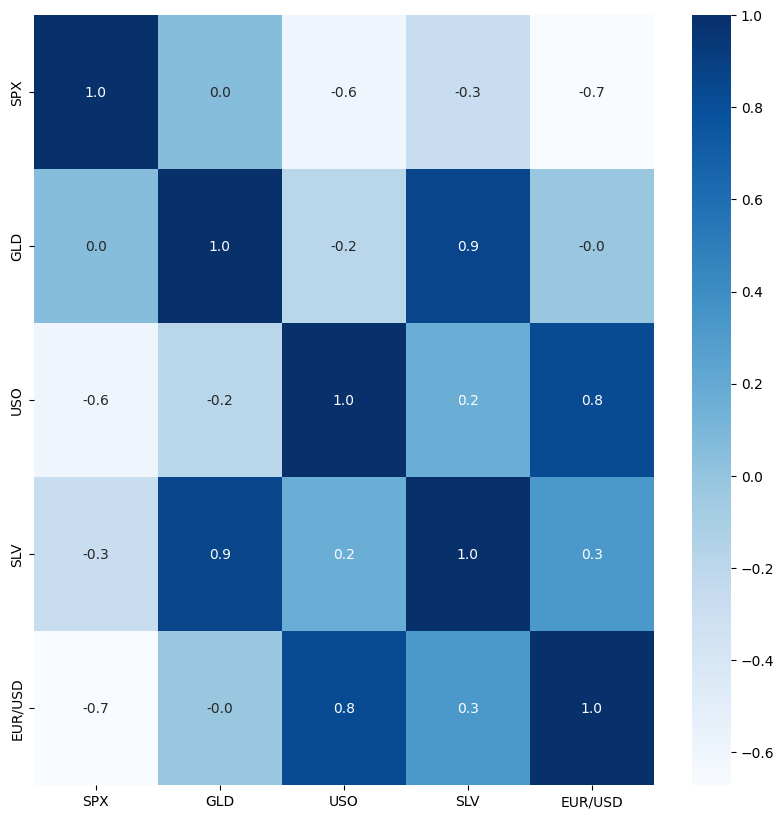

In [9]:
plot = plt.figure(figsize=(10,10))
sns.heatmap(correlation, annot=True, fmt='.1f' ,cmap="Blues")

In [10]:
# correlation value of Gold
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


<Axes: xlabel='GLD', ylabel='Count'>

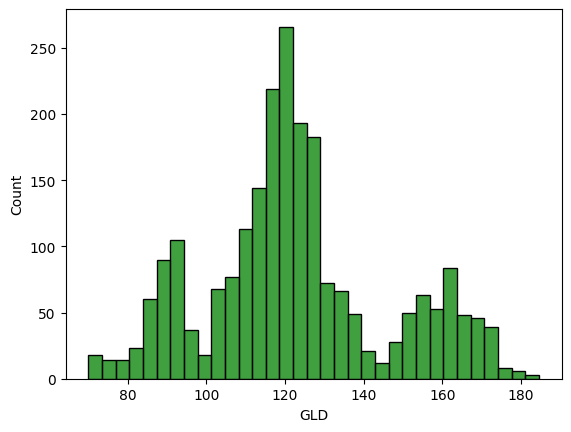

In [11]:
# Check the Distribution of the GLD
sns.histplot(gold_dataset['GLD'], color='green')

In [12]:
X = gold_dataset.drop(['GLD'],axis=1)
Y = gold_dataset['GLD']

In [13]:
# Training and Testing Split 
Train_X, Test_X, Train_Y, Test_Y = train_test_split(X,Y,test_size=0.2)

In [14]:
print(Train_X.shape)
print(Train_Y.shape)
print(Test_X.shape)
print(Test_Y.shape)

(1832, 4)
(1832,)
(458, 4)
(458,)


In [15]:
model = RandomForestRegressor(n_estimators=100)

In [16]:
model.fit(Train_X,Train_Y)

RandomForestRegressor()

In [17]:
Train_pred = model.predict(Train_X)

In [18]:
Accuracy_Train = metrics.r2_score(Train_pred,Train_Y)

In [19]:
print(Accuracy_Train)

0.9984583239221765


In [21]:
Test_pred = model.predict(Test_X)

In [23]:
Accuracy_Test = metrics.r2_score(Test_Y, Test_pred)

In [24]:
print(Accuracy_Test)

0.9876538222580462


In [25]:
Test_Y = list(Test_Y)

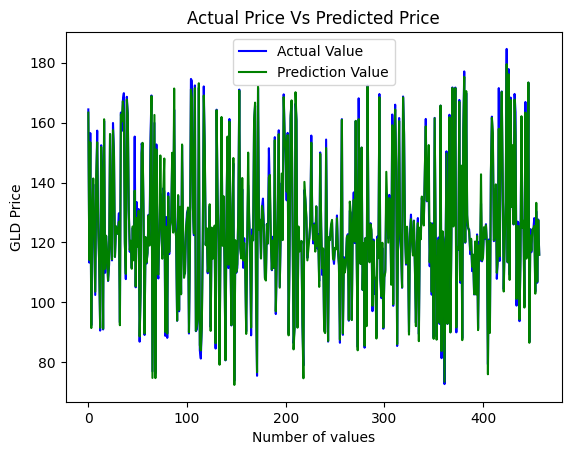

In [29]:
plt.plot(Test_Y, color='blue', label="Actual Value")
plt.plot(Test_pred, color='green', label="Prediction Value")
plt.title("Actual Price Vs Predicted Price")
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()